# Variance - Covariance matrix 

The formula for __variance__ is given by

$ \Large \sigma^2_x = \frac{1}{n-1} \sum^{n}_{i=1}(x_i – \bar{x})^2  = \sigma{(x, x)}$

where n is the number of samples (e.g. the number of people) and 
$\bar{x}$  is the mean of the random variable x
(represented as a vector)
 
The __covariance__ $\sigma (x, y)$  of two random variables x  and y  is given by

$ \Large \sigma(x, y) = \frac{1}{n-1} \sum^{n}_{i=1}{(x_i-\bar{x})(y_i-\bar{y})}$

The variance $\sigma_x^2$ of a random variable x can be also expressed as the covariance with itself by $\sigma(x, x)$

### Covariance Matrix
With the covariance we can calculate entries of the covariance matrix, which is a __square matrix__ given by $ C_{i,j} = \sigma(x_i, x_j) $

Also the covariance matrix is __symmetric__ since $ \sigma(x_i, x_j) = \sigma(x_j, x_i)$

The diagonal entries of the covariance matrix are the variances and the other entries are the covariances. For this reason, the covariance matrix is sometimes called the _variance-covariance matrix_.

let us consider a 2D plot

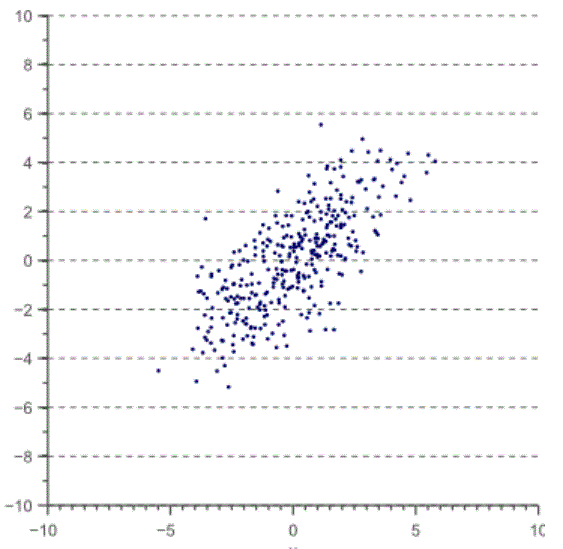


For this data, we could calculate the variance $\sigma{(x, x)}$ in the x-direction and $\sigma{(y, y)}$ in the y-direction.

However, the horizontal spread and the vertical spread of the data does not explain the clear diagonal correlation.

The plot clearly shows that on average, if the x-value of a data point increases, then also the y-value increases, resulting in a positive correlation. 

This correlation can be captured by extending the notion of variance to what is called the ‘covariance’ of the data:

$ \LARGE VCOV = \left( \begin{array}{ccc}  \sigma(x, x) & \sigma(x, y) \\  \sigma(y, x) & \sigma(y, y) \end{array} \right)$ 

2-dimensional normally distributed data is explained completely by its mean and its $2\times 2$ covariance matrix. Similarly, a $3 \times 3$ covariance matrix is used to capture the spread of three-dimensional data, and a $N \times N$ covariance matrix captures the spread of N-dimensional data.

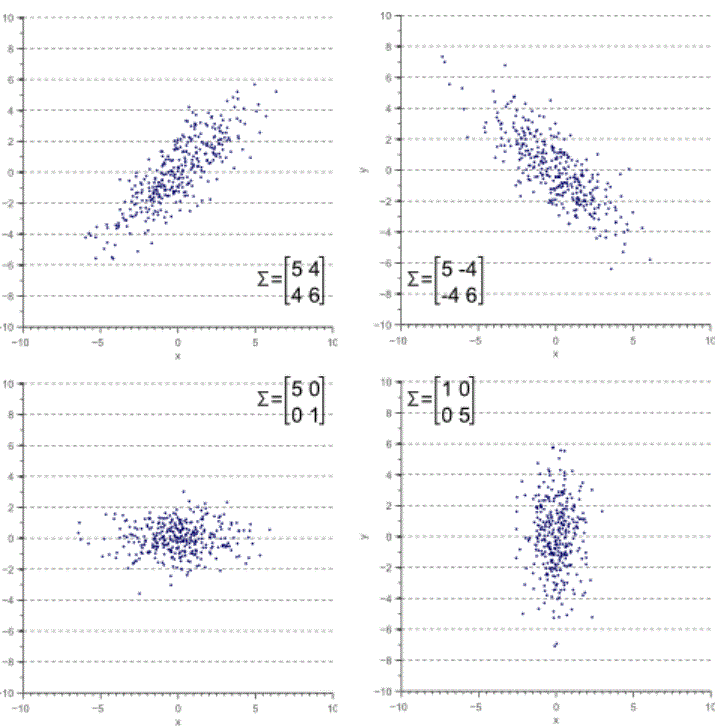

** the covariance matrix defines both 
    - the spread (variance), and 
    - the orientation (covariance) of our data.**

In [53]:
import numpy as np
import pandas as pd

import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

plt.rcParams['figure.figsize'] = (12, 8)

# select the style of the plot
style.use('ggplot')

%matplotlib inline  

In [54]:
np.set_printoptions(precision=6)

In [55]:
# dummy data of 5 students test scores

#              Math	English	Art
A = np.array([ [90, 60,     90],
               [90, 90,     30],
               [60, 60,     60],
               [60, 60,     90],
               [30, 30,     30]
             ])
A

array([[90, 60, 90],
       [90, 90, 30],
       [60, 60, 60],
       [60, 60, 90],
       [30, 30, 30]])

compute the variance of each test and the covariance between the tests.

#### Step 1 : transform the raw scores in matrix A to deviation scores in matrix a,

In [56]:
A.shape[0]

5

In [57]:
ones_array = np.ones([A.shape[0], A.shape[0]])
ones_array

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [58]:
ones_array@A

array([[330., 300., 300.],
       [330., 300., 300.],
       [330., 300., 300.],
       [330., 300., 300.],
       [330., 300., 300.]])

In [59]:
(ones_array@A)*1/A.shape[0]

array([[66., 60., 60.],
       [66., 60., 60.],
       [66., 60., 60.],
       [66., 60., 60.],
       [66., 60., 60.]])

In [60]:
# calculate the deviation score
a = A - (ones_array@A)*1/A.shape[0]
a

array([[ 24.,   0.,  30.],
       [ 24.,  30., -30.],
       [ -6.,   0.,   0.],
       [ -6.,   0.,  30.],
       [-36., -30., -30.]])

#### Step 2 : find the deviation score sums of squares matrix, we compute $a^Ta$

In [61]:
a_sq_matrix = a.T@a
a_sq_matrix

array([[2520., 1800.,  900.],
       [1800., 1800.,    0.],
       [ 900.,    0., 3600.]])

#### Step 3 : create the variance-covariance matrix, we divide each element in the deviation sum of squares matrix by n,

In [62]:
VCOV = a_sq_matrix/A.shape[0]
VCOV

array([[504., 360., 180.],
       [360., 360.,   0.],
       [180.,   0., 720.]])

- We can interpret the variance and covariance statistics in matrix V to understand how the various test scores vary and covary.

- along the diagonal, we see the variance of scores for each test. 
- The art test has the biggest variance (720); and the English test, the smallest (360). 
- So we can say that art test scores are more variable than English test scores.

- The covariance is displayed in the off-diagonal elements of matrix V.
- The covariance between math and English is positive (360), and the covariance between math and art is positive (180). This means the scores tend to covary in a positive way. As scores on math go up, scores on art and English also tend to go up; and vice versa.
- The covariance between English and art, however, is zero. This means there tends to be no predictable relationship between the movement of English and art scores.
- If the covariance between any tests had been negative, it would have meant that the test scores on those tests tend to move in opposite directions. That is, students with relatively high scores on the first test would tend to have relatively low scores on the second test.

The calculation for the covariance matrix can be also expressed as

$ \LARGE VCOV = \frac{1}{n-1} \sum^{n}_{i=1}{(X_i-\bar{X})(X_i-\bar{X})^T}$

Following from this equation, the covariance matrix can be computed for a data set with __zero mean__ with $\LARGE VCOV = \frac{XX^T}{n-1}$

Following from the previous equations the covariance matrix for two dimensions is given by


$ \LARGE VCOV = \left( \begin{array}{ccc}  \sigma(x, x) & \sigma(x, y) \\  \sigma(y, x) & \sigma(y, y) \end{array} \right)$ 

__np.random.normal__

** Parameters:	** 
- loc   : Mean (“centre”) of the distribution.

- scale : Standard deviation (spread or “width”) of the distribution.

- size  : Output shape. 
    - If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. 
    - If size is None (default), a single value is returned if loc and scale are both scalars.
    - Otherwise, np.broadcast(loc, scale).size samples are drawn.

In [27]:
# Normal distributed x and y vector with mean 0 and standard deviation 1

x = np.random.normal(2, 1, 500)
y = np.random.normal(2, 1, 500)

In [28]:
x[:3]

array([0.902263, 2.682496, 1.661834])

In [29]:
y[:3]

array([0.360494, 1.720422, 2.524803])

In [30]:
X = np.vstack((x, y))
X.shape

(2, 500)

In [31]:
X[:3]

array([[ 0.902263,  2.682496,  1.661834,  3.212016,  2.084787,  1.628168,
         1.77606 ,  1.173613,  2.958306,  3.373896,  1.999068,  1.243982,
         2.199556,  1.88701 ,  1.955825,  2.432468,  3.145954,  0.940969,
         1.897351,  4.103203,  0.806543,  3.788902,  0.696079,  2.306455,
        -0.177241, -1.128606,  2.15524 ,  1.494506,  2.100031,  2.582932,
         1.119653, -0.674904,  1.800263,  2.341229,  2.038408,  1.501347,
         2.292398,  0.80142 ,  1.650689,  2.001333,  4.634174,  1.747451,
         2.255226,  1.023243,  1.578601,  2.367234,  2.820909,  3.865102,
         3.300756,  3.5183  ,  4.514862,  2.872473,  1.718568,  3.040618,
         1.104657,  2.603753,  2.839489,  1.040821,  3.391658,  2.767948,
         3.277559,  1.747857,  1.391776,  3.456049,  1.572922,  1.978513,
         1.588148,  2.480996,  1.692689,  3.698598,  1.340282,  0.194324,
         4.509397,  1.654261,  1.522692,  1.457257,  2.69988 ,  3.217627,
        -0.305977,  2.978071, -0.72480

In [32]:
X = X.T
X.shape

(500, 2)

In [33]:
X[:2]

array([[0.902263, 0.360494],
       [2.682496, 1.720422]])

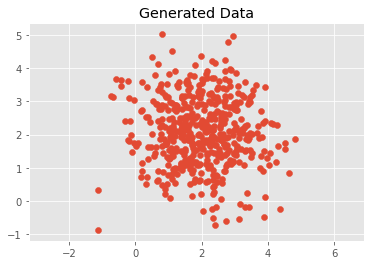

In [34]:
plt.scatter(X[:, 0], X[:, 1])

plt.title('Generated Data')
plt.axis('equal');

This case would mean that x and y are independent (or uncorrelated) and the covariance matrix =

$VCOV = \left( \begin{array}{ccc}  \sigma_x^2 & 0 \\  0 & \sigma_y^2 \end{array} \right)$

let us check this ..

In [35]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
cov_mat(X.T) # (or with np.cov(X.T))

array([[ 1.060701, -0.065843],
       [-0.065843,  1.048429]])

In [36]:
df = pd.DataFrame(data=X, columns=['X1', 'X2'])

In [37]:
df.shape

(500, 2)

In [38]:
df.corr()

,X1,X2
X1,1.000000,-0.062438
X2,-0.062438,1.000000


In [39]:
df.cov()

,X1,X2
X1,1.060701,-0.065843
X2,-0.065843,1.048429


Which approximatelly gives us our expected covariance matrix with variances $\sigma_x^2 = \sigma_y^2 = 1$

#### Linear Transformations of the Data Set
Next, we will look at how transformations affect our data and the covariance matrix 
C. We will transform our data with the following scaling matrix.

$ S = \left( \begin{array}{ccc}  s_x & 0 \\  0 & s_y \end{array} \right)$

In [40]:
# Center the matrix at the origin
X = X - np.mean(X, 0)

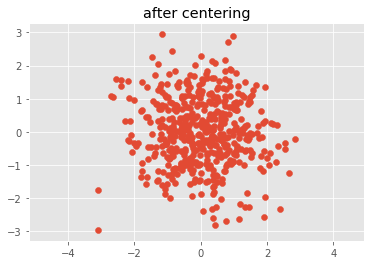

In [41]:
plt.scatter(X[:, 0], X[:, 1])
plt.title('after centering')
plt.axis('equal');

In [42]:
# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])
Scale

array([[0.7, 0. ],
       [0. , 3.4]])

In [43]:
# Apply scaling matrix to X
Y = X.dot(Scale)

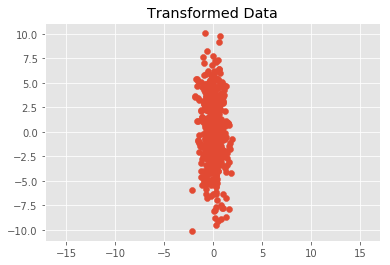

In [44]:
plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal');

In [45]:
# Calculate covariance matrix
cov_mat(Y.T)

array([[ 0.519743, -0.156707],
       [-0.156707, 12.119835]])

Now we will apply a linear transformation in the form of a transformation matrix T to the data set which will be composed of a two dimensional rotation matrix R and the previous scaling matrix 
S as follows

$T = RS$

where the rotation matrix  R is given by $R = \left( \begin{array}{ccc}  cos(\theta) & -sin(\theta) \\  sin(\theta) & cos(\theta) \end{array} \right)$

The transformed data is then calculated by $Y = TX$ or $Y = RSX$

In [46]:
# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

In [47]:
# Rotation matrix
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

In [48]:
# Transformation matrix
T = Scale.dot(Rot)

In [49]:
# Apply transformation matrix to X
Y = X.dot(T)

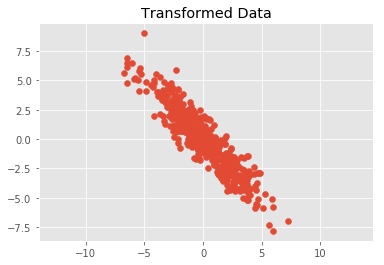

In [50]:
plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal');

In [51]:
# Calculate covariance matrix
cov_mat(Y.T)

array([[ 5.748322, -5.773951],
       [-5.773951,  6.891256]])

This leads to the question of how to decompose the covariance matrix C into a rotation matrix 
R and a scaling matrix S.

# Eigen Decomposition of the Covariance Matrix

- eigenvectors and eigenvalues uniquely define the covariance matrix, and therefore the shape of our data.
- Eigen Decomposition is one connection between a linear transformation and the covariance matrix.
- An eigenvector is a vector whose direction remains unchanged when a linear transformation is applied to it. 
- The eigenvectors are unit vectors representing the direction of the largest variance of the data, while the eigenvalues represent the magnitude of this variance in the corresponding directions. 

    - It can be expressed as $Av=\lambda v$

        - where v is an eigenvector of A and λ is the corresponding eigenvalue

Now say
- Covariance matrix = C
- All eigen vectors in a matrix V
- All eigen values in diagnonal matrix L 

then we caw write $CV = VL$

or $C = VLV^{-1}$


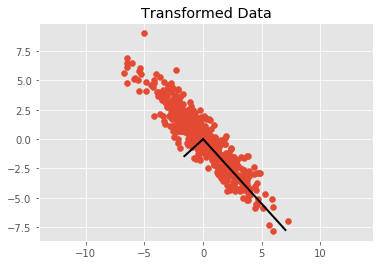

In [52]:
C = cov_mat(Y.T)
eVe, eVa = np.linalg.eig(C)

plt.scatter(Y[:, 0], Y[:, 1])

for e, v in zip(eVe, eVa.T):
    plt.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]], 'k-', lw=2)
    
plt.title('Transformed Data')
plt.axis('equal');